# Calibração de ruído

Rode a célula abaixo e selecione os pontos nos ratos corrigindo o ruído.

Loading sample frames: 100%|██████████| 100/100 [00:01<00:00, 58.67it/s]


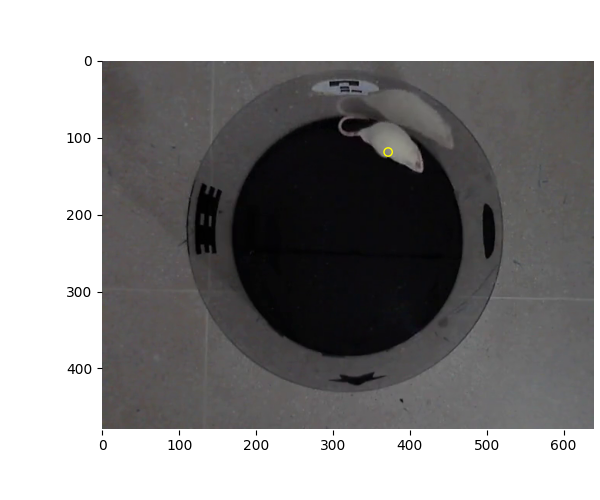

: 

In [ ]:
import keypoint_moseq as kpms # type: ignore

project_name = 'elm_ms'
project_dir = f'projects/{project_name}'

config = kpms.load_config(project_dir)
coordinates, confidences, bodyparts = kpms.load_keypoints(
    config["video_dir"], "deeplabcut", extension=".csv"
)

%matplotlib widget
kpms.noise_calibration(project_dir, coordinates, confidences, **config)
